# This tutorial follows a basic machine learning workflow:
+ Examine and understand data
+ Build an input pipeline
+ Build the model
+ Train the model
+ Test the model
+ Improve the model and repeat the process

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf

print(tf.__version__)

2.0.0


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

## Load data

In [4]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')


68608000/68606236 [==============================] - 93s 1us/step


In [5]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [6]:
train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

## Understand the data

In [8]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [9]:
train_cats_dir

'/home/tim/.keras/datasets/cats_and_dogs_filtered/train/cats'

In [10]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


## Parameters setup

In [11]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

## Data preparation

In [12]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [13]:
train_data_gen = train_image_generator.flow_from_directory(
    batch_size = batch_size,
    directory = train_dir,
    shuffle=True,
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.


In [14]:
val_data_gen = validation_image_generator.flow_from_directory(
    batch_size = batch_size,
    directory = validation_dir,
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    class_mode = 'binary'
)

Found 1000 images belonging to 2 classes.


## Visualize training images

In [15]:
sample_training_images, _ = next(train_data_gen)

In [16]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
        
    plt.tight_layout()
    plt.show()

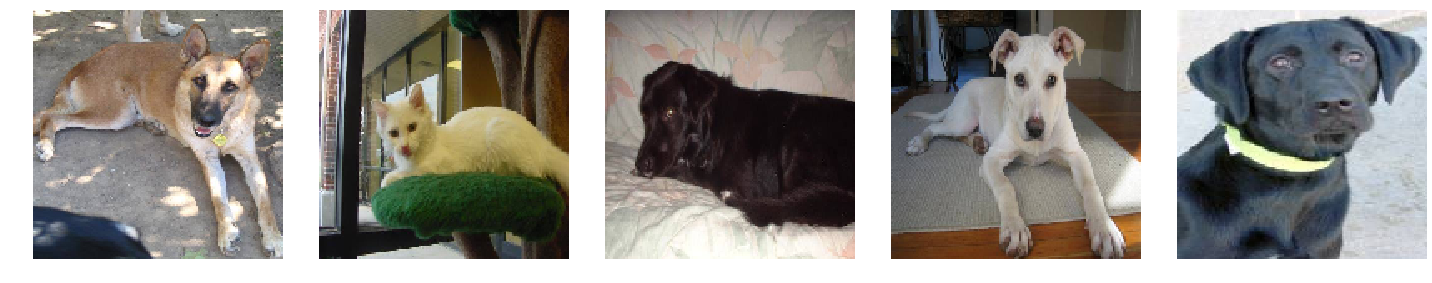

In [17]:
plotImages(sample_training_images[:5])

## create the model

In [18]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

## Compile the model

In [19]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Model summary

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

## Train the model

In [21]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch = total_train // batch_size,
    epochs = epochs,
    validation_data = val_data_gen,
    validation_steps = total_val // batch_size
)

Epoch 1/15
15/15 [==============================] - 26s 2s/step - loss: 0.8329 - accuracy: 0.5235 - val_loss: 0.6944 - val_accuracy: 0.4922
Epoch 2/15
15/15 [==============================] - 26s 2s/step - loss: 0.6806 - accuracy: 0.5542 - val_loss: 0.6761 - val_accuracy: 0.5100
Epoch 3/15
15/15 [==============================] - 25s 2s/step - loss: 0.6384 - accuracy: 0.6261 - val_loss: 0.5969 - val_accuracy: 0.6908
Epoch 4/15
15/15 [==============================] - 25s 2s/step - loss: 0.5859 - accuracy: 0.6982 - val_loss: 0.5982 - val_accuracy: 0.6473
Epoch 5/15
15/15 [==============================] - 25s 2s/step - loss: 0.5332 - accuracy: 0.7447 - val_loss: 0.5593 - val_accuracy: 0.7054
Epoch 6/15
15/15 [==============================] - 25s 2s/step - loss: 0.4853 - accuracy: 0.7714 - val_loss: 0.5861 - val_accuracy: 0.6964
Epoch 7/15
15/15 [==============================] - 25s 2s/step - loss: 0.4195 - accuracy: 0.8093 - val_loss: 0.5848 - val_accuracy: 0.7221
Epoch 8/15
15/15 [==

## Visualize training results

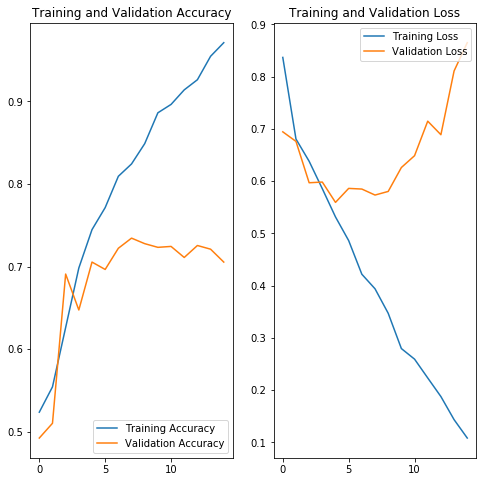

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)

plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title("Training and Validation Accuracy")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title("Training and Validation Loss")
plt.show()

## Overfitting

## Data augmentation

In [25]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

In [26]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 2000 images belonging to 2 classes.


In [27]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]

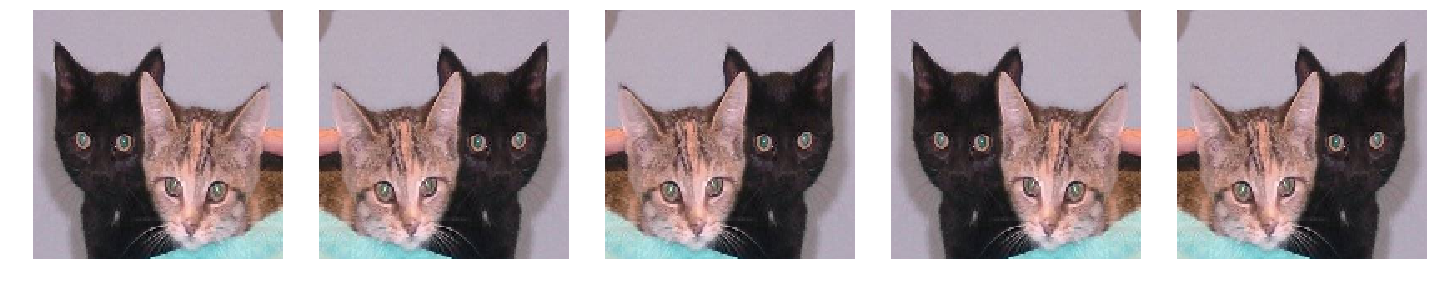

In [28]:
plotImages(augmented_images)

In [29]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

In [31]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

Found 2000 images belonging to 2 classes.


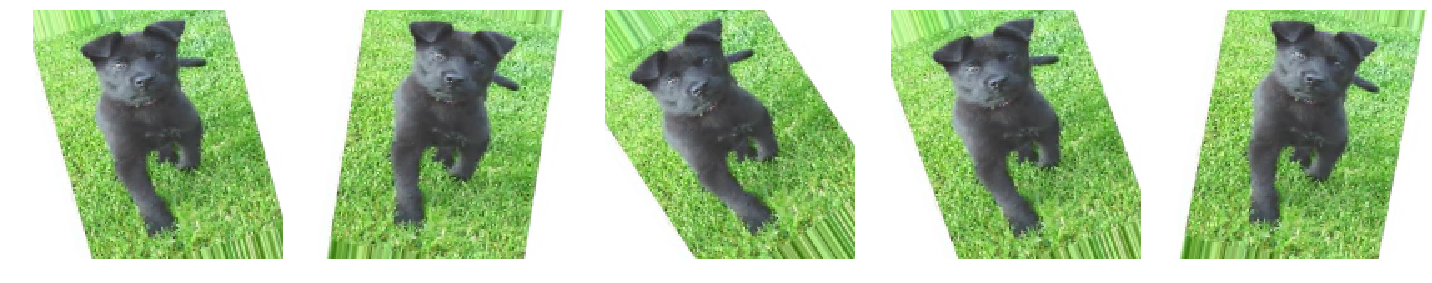

In [32]:
plotImages(augmented_images)

In [37]:
# zoom_range from 0 - 1 where 1 = 100%
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

In [40]:
train_data_gen = image_gen.flow_from_directory(
    batch_size = batch_size,
    directory = train_dir,
    shuffle = True,
    target_size = (IMG_HEIGHT, IMG_WIDTH)
)

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

Found 2000 images belonging to 2 classes.


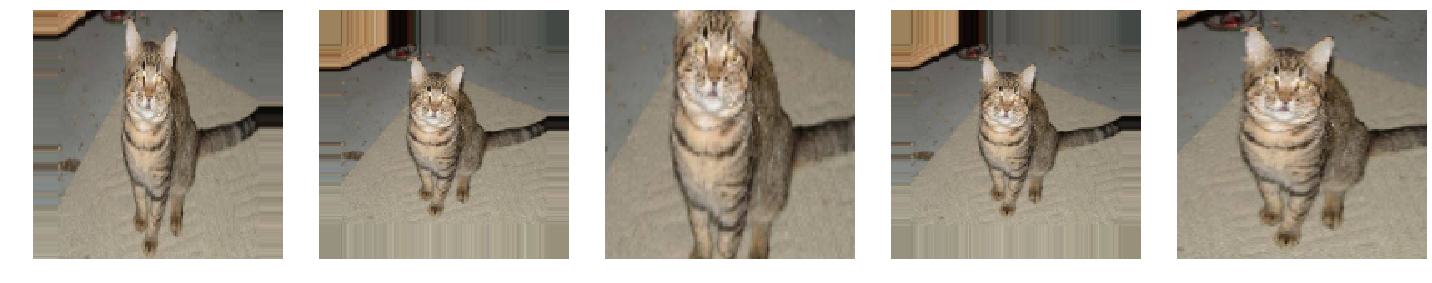

In [41]:
plotImages(augmented_images)

## Put it together.

In [42]:
image_gen_train = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 45,
    width_shift_range = .15,
    height_shift_range = .15,
    horizontal_flip = True,
    zoom_range = 0.5
)

In [43]:
train_data_gen = image_gen_train.flow_from_directory(
    batch_size = batch_size,
    directory = train_dir,
    shuffle = True,
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.


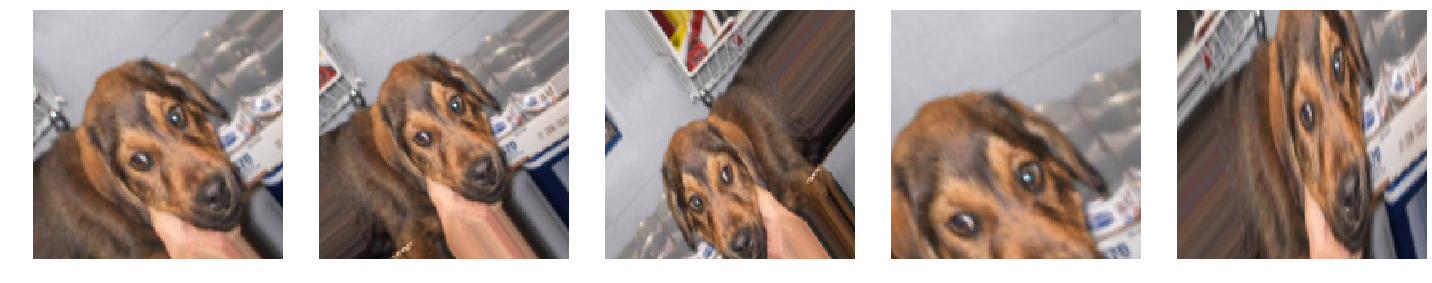

In [44]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

## Create validation data generator

In [45]:
image_gen_val = ImageDataGenerator(rescale=1./255)

In [46]:
val_data_gen = image_gen_val.flow_from_directory(
    batch_size = batch_size,
    directory = validation_dir,
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary'
)

Found 1000 images belonging to 2 classes.


## Dropout
## Creating a new network with Dropouts

In [48]:
model_new = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

## Compile the model

In [49]:
model_new.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_new.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 18, 18, 64)       

## Train the model

In [50]:
history = model_new.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)


Epoch 1/15
15/15 [==============================] - 31s 2s/step - loss: 2.3001 - accuracy: 0.5130 - val_loss: 0.7002 - val_accuracy: 0.5056
Epoch 2/15
15/15 [==============================] - 29s 2s/step - loss: 0.6944 - accuracy: 0.4923 - val_loss: 0.6930 - val_accuracy: 0.5056
Epoch 3/15
15/15 [==============================] - 29s 2s/step - loss: 0.6930 - accuracy: 0.5085 - val_loss: 0.6927 - val_accuracy: 0.5056
Epoch 4/15
15/15 [==============================] - 31s 2s/step - loss: 0.6929 - accuracy: 0.5026 - val_loss: 0.6923 - val_accuracy: 0.5067
Epoch 5/15
15/15 [==============================] - 29s 2s/step - loss: 0.6923 - accuracy: 0.5121 - val_loss: 0.6914 - val_accuracy: 0.5089
Epoch 6/15
15/15 [==============================] - 30s 2s/step - loss: 0.6924 - accuracy: 0.5156 - val_loss: 0.6898 - val_accuracy: 0.5536
Epoch 7/15
15/15 [==============================] - 30s 2s/step - loss: 0.6891 - accuracy: 0.5401 - val_loss: 0.6805 - val_accuracy: 0.5781
Epoch 8/15
15/15 [==

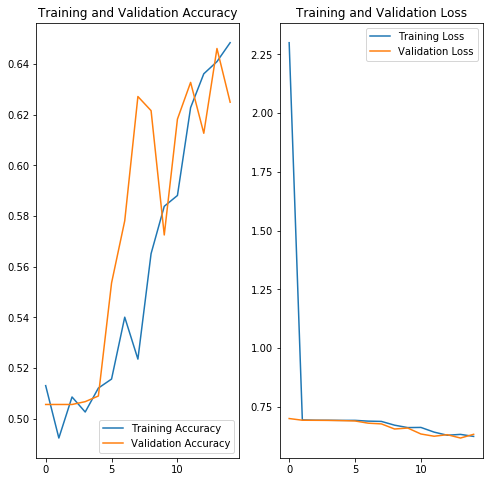

In [51]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
